# Author: Dashyanng Kachru

# Machine Learning:

## Importing modules

In [62]:
import numpy as np
import pandas as pd     
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns    
from pandas.api.types import CategoricalDtype 

from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

## Loading dataset and storing in a pandas dataframe

In [63]:
df2 = pd.read_csv("diabetes_explore2_cleaned_data.csv", sep='\t') 
df2.head()

,preg,plas,pres,mass,pedi,age,class
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [64]:
df2.corr()

,preg,plas,pres,mass,pedi,age,class
preg,1.000000,0.128135,0.214178,0.021719,-0.033523,0.544341,0.221898
plas,0.128135,1.000000,0.223192,0.232771,0.137246,0.267136,0.494650
pres,0.214178,0.223192,1.000000,0.289230,-0.002805,0.330107,0.170589
mass,0.021719,0.232771,0.289230,1.000000,0.155382,0.025841,0.313680
pedi,-0.033523,0.137246,-0.002805,0.155382,1.000000,0.033561,0.173844
age,0.544341,0.267136,0.330107,0.025841,0.033561,1.000000,0.238356
class,0.221898,0.494650,0.170589,0.313680,0.173844,0.238356,1.000000


#### X has all predictor variables (preg, plas, pres, mass, pedi, age)
#### y has only the response variable (class) 

In [65]:
X = df2.drop(labels=['class'], axis=1)
print (X)
y = df2.loc[:,'class'] 
print (y)
print (y.unique())
X_col_names = X.columns.values
X_col_names

     preg   plas  pres  mass   pedi  age
0       6  148.0  72.0  33.6  0.627   50
1       1   85.0  66.0  26.6  0.351   31
2       8  183.0  64.0  23.3  0.672   32
3       1   89.0  66.0  28.1  0.167   21
4       0  137.0  40.0  43.1  2.288   33
..    ...    ...   ...   ...    ...  ...
763    10  101.0  76.0  32.9  0.171   63
764     2  122.0  70.0  36.8  0.340   27
765     5  121.0  72.0  26.2  0.245   30
766     1  126.0  60.0  30.1  0.349   47
767     1   93.0  70.0  30.4  0.315   23

[768 rows x 6 columns]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64
[1 0]


array(['preg', 'plas', 'pres', 'mass', 'pedi', 'age'], dtype=object)

## Splitting into training and test data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

     preg   plas  pres  mass   pedi  age
216     5  109.0  62.0  35.8  0.514   25
556     1   97.0  70.0  38.1  0.218   30
540     8  100.0  74.0  39.4  0.661   43
697     0   99.0   NaN  25.0  0.253   22
340     1  130.0  70.0  25.9  0.472   22
..    ...    ...   ...   ...    ...  ...
721     1  114.0  66.0  38.1  0.289   21
326     1  122.0  64.0  35.1  0.692   30
712    10  129.0  62.0  41.2  0.441   38
137     0   93.0  60.0  28.7  0.532   22
645     2  157.0  74.0  39.4  0.134   30

[537 rows x 6 columns]
537 537
231 231


## Imputing missing values

In [67]:
imp_x = Imputer(missing_values='NaN', strategy='mean', axis=0) 
X_train = imp_x.fit_transform(X_train)  
X_test = imp_x.transform(X_test) 

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [68]:
svc = SVC(kernel='rbf', cache_size=1000) 
print (svc)
clf = svc.fit(X_train,y_train) 
y_pred = svc.predict(X_test) 
pTot = accuracy_score(y_test, y_pred)
print ("Prediction accuracy: ", pTot)
print (confusion_matrix(y_test, y_pred))

SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.6536796536796536
[[150   0]
 [ 80   1]]


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [69]:
print(confusion_matrix(y_test, y_pred))

[[150   0]
 [ 80   1]]


In [70]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       1.00      0.01      0.02        81

    accuracy                           0.65       231
   macro avg       0.83      0.51      0.41       231
weighted avg       0.77      0.65      0.52       231



## Using Min Max Scaler

In [71]:
print (X_test) #compare before/after scaling
min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)# fit AND transform training set
X_test_minmax = min_max_scaler.transform(X_test)# test set transform only, no fit
X_test_minmax 

[[  0.    131.     66.     34.3     0.196  22.   ]
 [  0.    165.     90.     52.3     0.427  23.   ]
 [  7.    102.     74.     37.2     0.204  45.   ]
 ...
 [  1.    172.     68.     42.4     0.702  28.   ]
 [  5.    158.     84.     39.4     0.395  29.   ]
 [  4.    151.     90.     29.7     0.294  36.   ]]


array([[0.        , 0.56493506, 0.45      , 0.3907767 , 0.04794521,
        0.01666667],
       [0.        , 0.78571429, 0.75      , 0.8276699 , 0.14683219,
        0.03333333],
       [0.41176471, 0.37662338, 0.55      , 0.46116505, 0.05136986,
        0.4       ],
       ...,
       [0.05882353, 0.83116883, 0.475     , 0.58737864, 0.26455479,
        0.11666667],
       [0.29411765, 0.74025974, 0.675     , 0.51456311, 0.13313356,
        0.13333333],
       [0.23529412, 0.69480519, 0.75      , 0.27912621, 0.08989726,
        0.25      ]])

### Using rbf kernel

In [72]:
svc = SVC(kernel='rbf', class_weight='balanced', cache_size=1000, probability=True) 
print (svc) 
clf = svc.fit(X_train_minmax, y_train) # trains the classifier on the training set
y_pred_minmax = svc.predict(X_test_minmax) # tests the classifier on the test set
pTot = accuracy_score(y_test, y_pred_minmax)
print ("Prediction accuracy: ",pTot)

SVC(C=1.0, cache_size=1000, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Prediction accuracy:  0.7316017316017316


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [73]:
print(confusion_matrix(y_test, y_pred_minmax))
print(classification_report(y_test, y_pred_minmax))

[[117  33]
 [ 29  52]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       150
           1       0.61      0.64      0.63        81

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



In [74]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("thresholds", thresholds)
print ("probas_", probas_)
print ("AUC using predict_proba", roc_auc)

thresholds [1.95319146 0.95319146 0.93351125 0.91671276 0.82960134 0.82787653
 0.7469268  0.73143438 0.72818754 0.72038023 0.69592606 0.69315597
 0.67931128 0.67513229 0.66913393 0.66333714 0.64723702 0.64577203
 0.58800925 0.56152956 0.55555155 0.54907981 0.54487711 0.52686177
 0.51613326 0.5        0.49239629 0.49138343 0.48872323 0.4885262
 0.48262003 0.46314265 0.4300798  0.40969462 0.39541541 0.38155922
 0.37254855 0.369493   0.3676675  0.35219675 0.34532053 0.33936892
 0.33821204 0.32828013 0.32747628 0.29772793 0.29632496 0.29269635
 0.29171442 0.28635733 0.28576357 0.28068476 0.27631182 0.26557721
 0.26528215 0.25593797 0.25346578 0.24270999 0.24246171 0.23673123
 0.22113412 0.20699414 0.20684621 0.19969391 0.19386228 0.18558923
 0.18494405 0.17766873 0.17628655 0.17349967 0.16393672 0.1612268
 0.16120573 0.14383874 0.13839976 0.13575698 0.1324315  0.09539445
 0.09505699 0.04652223 0.04538195 0.01961686]
probas_ [[0.82371345 0.17628655]
 [0.26856562 0.73143438]
 [0.66505671 0.3

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [75]:
%matplotlib inline

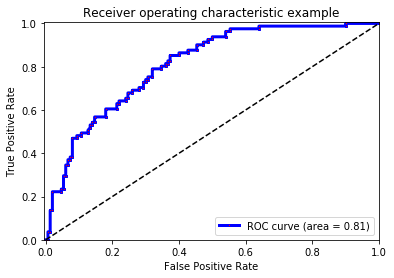

In [76]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [77]:
C_range = 10.0 ** np.arange(-2, 4)
gamma_range = [.01, .1, 1, 'auto', 10, 100]
print (gamma_range)
param_grid = dict(gamma=gamma_range, C=C_range)
param_grid

[0.01, 0.1, 1, 'auto', 10, 100]


{'gamma': [0.01, 0.1, 1, 'auto', 10, 100],
 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [78]:
# 5-fold cross validation
grid = GridSearchCV(SVC(kernel='rbf',cache_size=1000, probability=True), param_grid=param_grid, cv = 5) 
grid.fit(X_train_minmax, y_train)
best_C = grid.best_estimator_.C
best_gamma = grid.best_estimator_.gamma
print ("The best C and gamma for rbf is: %.5f, %.5f " % (best_C, best_gamma))
print (grid.best_estimator_)

The best C and gamma for rbf is: 1.00000, 0.10000 
SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [79]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print ("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, best_predict_minmax)
print (cm)
report = classification_report(y_test, best_predict_minmax)
print (report) 

Prediction accuracy:  0.7619047619047619
[[137  13]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       150
           1       0.75      0.48      0.59        81

    accuracy                           0.76       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231



#### After doing GridSearchCV (cross validation = 5), through best_estimator_ we find the best parameters and use that for our model with C = 1, gamma = 0.1 for rbf kernel

In [80]:
test_svc = SVC(C=1, gamma=0.10000 ,kernel='rbf', cache_size=1000, probability=True) 
clf_test = test_svc.fit(X_train_minmax, y_train) 
y_pred_minmax_test = test_svc.predict(X_test_minmax) 
pTot = accuracy_score(y_test, y_pred_minmax_test)
print ("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7619047619047619


In [81]:
cm = confusion_matrix(y_test, y_pred_minmax_test)
print (cm)
report = classification_report(y_test, y_pred_minmax_test)
print (report) 

[[137  13]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       150
           1       0.75      0.48      0.59        81

    accuracy                           0.76       231
   macro avg       0.76      0.70      0.71       231
weighted avg       0.76      0.76      0.75       231



In [82]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1]) 
roc_auc = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc)
probas_

AUC using predict_proba 0.8097119341563787


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[0.8248317 , 0.1751683 ],
       [0.26352806, 0.73647194],
       [0.66435249, 0.33564751],
       [0.96553536, 0.03446464],
       [0.58845822, 0.41154178],
       [0.75798192, 0.24201808],
       [0.07997716, 0.92002284],
       [0.50847769, 0.49152231],
       [0.56776113, 0.43223887],
       [0.90904247, 0.09095753],
       [0.83727585, 0.16272415],
       [0.31276391, 0.68723609],
       [0.94487819, 0.05512181],
       [0.5       , 0.5       ],
       [0.96686383, 0.03313617],
       [0.93767688, 0.06232312],
       [0.84951098, 0.15048902],
       [0.88191815, 0.11808185],
       [0.6719281 , 0.3280719 ],
       [0.94250138, 0.05749862],
       [0.5086217 , 0.4913783 ],
       [0.75773068, 0.24226932],
       [0.65185504, 0.34814496],
       [0.12032802, 0.87967198],
       [0.2762487 , 0.7237513 ],
       [0.21464851, 0.78535149],
       [0.50827801, 0.49172199],
       [0.71447003, 0.28552997],
       [0.39566135, 0.60433865],
       [0.57152205, 0.42847795],
       [0.

In [83]:
%matplotlib inline

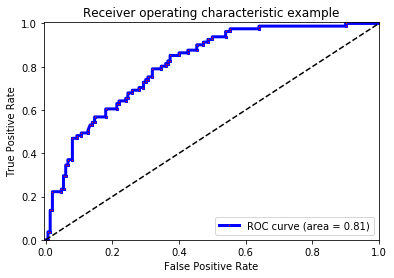

In [84]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--')

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Using polynomial kernel

In [85]:
param_grid = [{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly'], 'degree': [1,2,3,4]}]
param_grid

[{'C': [1, 10, 100, 1000],
  'gamma': [0.001, 0.0001],
  'kernel': ['poly'],
  'degree': [1, 2, 3, 4]}]

In [86]:
# 5-fold cross validation
grid = GridSearchCV(SVC(kernel= 'poly',cache_size=1000, probability=True), param_grid=param_grid, cv = 5) 
grid.fit(X_train_minmax, y_train)
best_degree = grid.best_estimator_.degree
print ("The best degree for polynomial is: %.5f " % (best_degree))
print (grid.best_estimator_)
print(len(X_train_minmax))

The best degree for polynomial is: 1.00000 
SVC(C=1000, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.001, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
537


In [87]:
best_predict_minmax = grid.best_estimator_.predict(X_test_minmax)
pTot = accuracy_score(y_test, best_predict_minmax)
print ("Prediction accuracy: ",pTot)
cm = confusion_matrix(y_test, best_predict_minmax)
print (cm)
report = classification_report(y_test, best_predict_minmax)
print (report)

Prediction accuracy:  0.7532467532467533
[[135  15]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       150
           1       0.72      0.48      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



#### After doing GridSearchCV (with cross validation = 5), through best_estimator_ we find the best parameters and use that for our model with C = 1000, degree=1, gamma=0.001 for polynomial kernel

In [88]:
test_svc = SVC(C=1000, gamma=0.001,kernel='poly', degree = 1, cache_size=1000, probability=True) 
clf_test = test_svc.fit(X_train_minmax, y_train) 
y_pred_minmax_test = test_svc.predict(X_test_minmax)
pTot = accuracy_score(y_test, y_pred_minmax_test)
print ("Prediction accuracy: ",pTot)

Prediction accuracy:  0.7532467532467533


In [89]:
cm = confusion_matrix(y_test, y_pred_minmax_test)
print (cm)
report = classification_report(y_test, y_pred_minmax_test)
print (report) 

[[135  15]
 [ 42  39]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       150
           1       0.72      0.48      0.58        81

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231



In [90]:
probas_ = svc.fit(X_train_minmax, y_train).predict_proba(X_test_minmax)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])  
roc_auc = auc(fpr, tpr)
print ("AUC using predict_proba", roc_auc)
probas_

AUC using predict_proba 0.8097119341563785


C:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[0.82808721, 0.17191279],
       [0.26795512, 0.73204488],
       [0.66908419, 0.33091581],
       [0.96630115, 0.03369885],
       [0.59384856, 0.40615144],
       [0.76212116, 0.23787884],
       [0.08166119, 0.91833881],
       [0.51414737, 0.48585263],
       [0.57327247, 0.42672753],
       [0.91090229, 0.08909771],
       [0.84034491, 0.15965509],
       [0.31766107, 0.68233893],
       [0.94608471, 0.05391529],
       [0.51022729, 0.48977271],
       [0.96760067, 0.03239933],
       [0.93899061, 0.06100939],
       [0.85239002, 0.14760998],
       [0.88426182, 0.11573818],
       [0.6805535 , 0.3194465 ],
       [0.94375729, 0.05624271],
       [0.5142913 , 0.4857087 ],
       [0.76187286, 0.23812714],
       [0.65670802, 0.34329198],
       [0.12275412, 0.87724588],
       [0.2808078 , 0.7191922 ],
       [0.21850052, 0.78149948],
       [0.5139478 , 0.4860522 ],
       [0.71907744, 0.28092256],
       [0.40130274, 0.59869726],
       [0.57701394, 0.42298606],
       [0.

In [91]:
%matplotlib inline

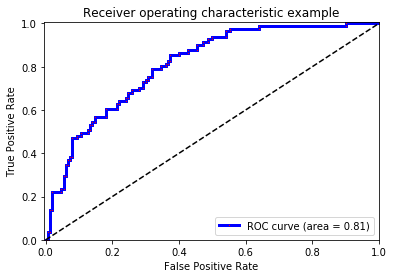

In [92]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, lw=3, color ="#0000ff", marker='s',markerfacecolor="red", markersize=2) 
plt.plot([0, 1], [0, 1], 'k--') 

# Set x and y ranges, labels, title and legend
plt.xlim([-0.005, 1.0])  
plt.ylim([0.0, 1.005])   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Standard scaling using KNeighbors

In [93]:
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
knn_scaled = pipeline.fit(X_train,y_train)
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

In [94]:
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))

Accuracy with Scaling: 0.7619047619047619
Accuracy without Scaling: 0.7575757575757576
